# `MEDUSA`
aka. Dynamic-Prospective LCA aka. Union(premise, temporalis)

Notebook demonstrating the dynamic characterization possibilities of medusa

In [33]:
from example_databases import *
db_dynamic_cf_test()

100%|██████████| 3/3 [00:00<00:00, 26829.24it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 20360.70it/s]

Vacuuming database 


In [34]:
demand = {('test', 'A'): 1}
gwp = ('GWP', 'example')

# `MEDUSA` LCA

In [35]:
def filter_function(database_id: int) -> bool:
    return False

Now we can do the graph traversal and create a timeline of edges:

In [36]:
import warnings
warnings.filterwarnings("ignore")

database_date_dict = {
            'test': "dynamic", # flag databases that should be temporally distributed with "dynamic"
        }

In [37]:
from timex_lca import MedusaLCA

In [38]:
mlca = MedusaLCA(demand, gwp, filter_function, database_date_dict, max_calc=1000)

Starting graph traversal
Calculation count: 0


In [39]:
mlca.build_timeline()

,hash_producer,time_mapped_producer,date_producer,producer,producer_name,hash_consumer,time_mapped_consumer,date_consumer,consumer,consumer_name,amount,interpolation_weights
0,2024,5,2024-01-01,4,A,2024,-1,2024-01-01,-1,-1,1.0,None


In [40]:
mlca.build_datapackage()

In [41]:
mlca.lci()

In [42]:
mlca.lcia()

In [43]:
print('New MEDUSA LCA Score:', mlca.score)

New MEDUSA LCA Score: 28.40999984741211


In [44]:
#mlca.calculate_dynamic_lci()


In [45]:
mlca.dynamic_inventory


{'CH4': {'time': array(['2024-01-01T00:00:00'], dtype='datetime64[s]'),
  'amount': array([1.]),
  'emitting_process': array([5])}}

### dynamic LCA 
Medusa allows to calculate radiative forcing [W/m2] and GWP [kg CO2eq] over fexible time horizons (TH). Default TH is 100 years.

The TH of analysis can be flexible (fixed_TH == False), which calculates the warming for the duration of TH from the timing each each emission or it can be fixed (fixed_TH), which harmonizes the duration of impact calculation to duration of TH starting from the functional unit. This means that emissions occuring later than the functional unit are counted for a shorter time (less impact) and emission occuring earlier are counted for a longer time (more impact). See more information in Levasseur 2010.

Calculate dynamic emissions for radiative forcing, flexible TH and 100 years TH (default)

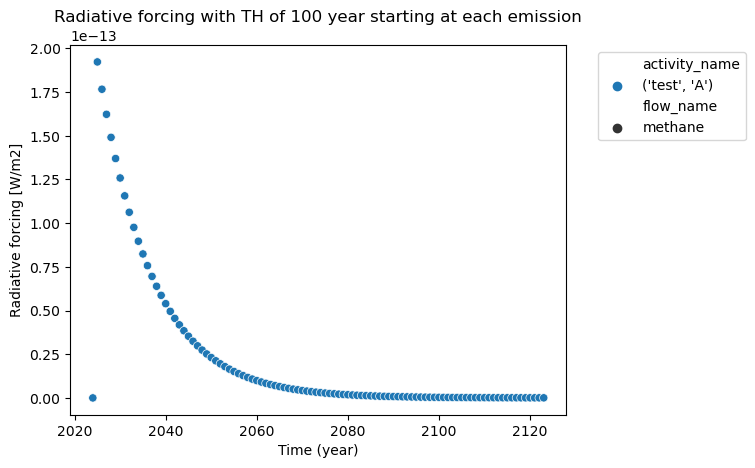

characterized dynamic score: 2.365167366927053e-12 [radiative_forcing (100 year)]


In [46]:

mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = False)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH} {mlca.temporal_grouping})]")

In [47]:
# show characterized inventory 
mlca.characterized_inventory

,date,amount,flow,flow_name,activity,activity_name,amount_sum
0,2024-01-01 00:00:00,0.000000e+00,2,methane,5,"(test, A)",0.000000e+00
1,2024-12-31 05:49:12,1.922234e-13,2,methane,5,"(test, A)",1.922234e-13
2,2025-12-31 11:38:24,1.766044e-13,2,methane,5,"(test, A)",3.688278e-13
3,2026-12-31 17:27:36,1.622546e-13,2,methane,5,"(test, A)",5.310824e-13
4,2027-12-31 23:16:48,1.490707e-13,2,methane,5,"(test, A)",6.801531e-13
...,...,...,...,...,...,...,...
95,2119-01-01 00:54:00,6.670712e-17,2,methane,5,"(test, A)",2.364951e-12
96,2120-01-01 06:43:12,6.128689e-17,2,methane,5,"(test, A)",2.365012e-12
97,2120-12-31 12:32:24,5.630707e-17,2,methane,5,"(test, A)",2.365068e-12
98,2121-12-31 18:21:36,5.173189e-17,2,methane,5,"(test, A)",2.365120e-12


Calculate dynamic emissions for radiative forcing, fixed TH and 100 years TH (default) -> forcing is cut off at timing of FU + TH

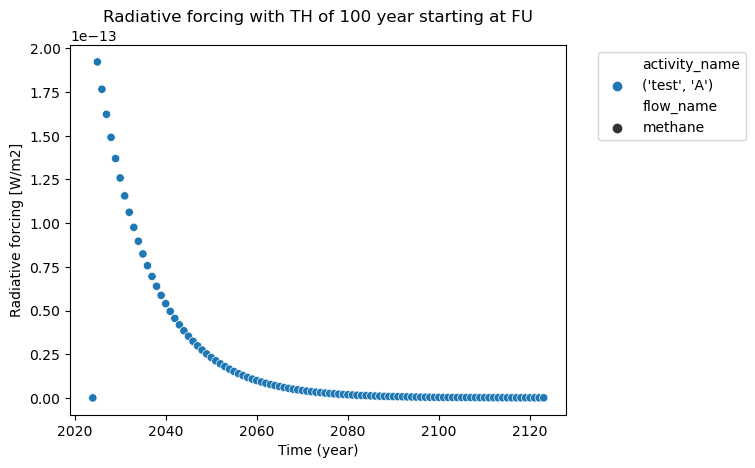

characterized dynamic score: 2.365167366927053e-12 [radiative_forcing (100)]


In [48]:
mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = True)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")


In [49]:
mlca.characterized_inventory

,date,amount,flow,flow_name,activity,activity_name,amount_sum
0,2024-01-01 00:00:00,0.000000e+00,2,methane,5,"(test, A)",0.000000e+00
1,2024-12-31 05:49:12,1.922234e-13,2,methane,5,"(test, A)",1.922234e-13
2,2025-12-31 11:38:24,1.766044e-13,2,methane,5,"(test, A)",3.688278e-13
3,2026-12-31 17:27:36,1.622546e-13,2,methane,5,"(test, A)",5.310824e-13
4,2027-12-31 23:16:48,1.490707e-13,2,methane,5,"(test, A)",6.801531e-13
...,...,...,...,...,...,...,...
95,2119-01-01 00:54:00,6.670712e-17,2,methane,5,"(test, A)",2.364951e-12
96,2120-01-01 06:43:12,6.128689e-17,2,methane,5,"(test, A)",2.365012e-12
97,2120-12-31 12:32:24,5.630707e-17,2,methane,5,"(test, A)",2.365068e-12
98,2121-12-31 18:21:36,5.173189e-17,2,methane,5,"(test, A)",2.365120e-12


We can also calculate dynamic emissions for GWP, flexible TH and 100 years TH (default)

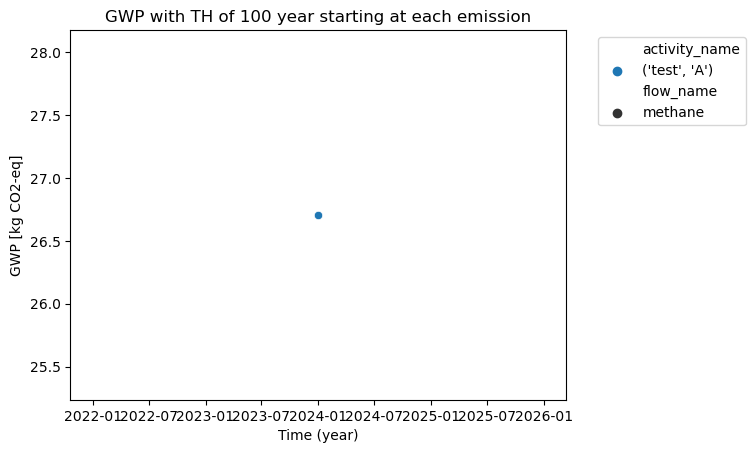

characterized dynamic score: 26.705808501447027 [GWP (100)]


In [50]:
mlca.characterize_dynamic_lci(type="GWP", fixed_TH = False, TH=100)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")

In [51]:
mlca.characterized_dynamic_score

26.705808501447027

With fixed TH of 100 years

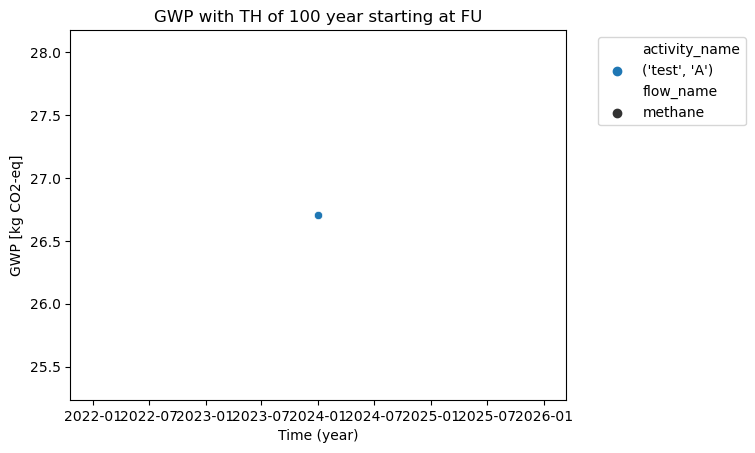

In [52]:
mlca.characterize_dynamic_lci(type="GWP", fixed_TH = True)
mlca.plot_dynamic_characterized_inventory()

In [53]:
mlca.characterized_dynamic_score

26.705808501447027

additionally, we can vary the TH: e.g. to 20 years


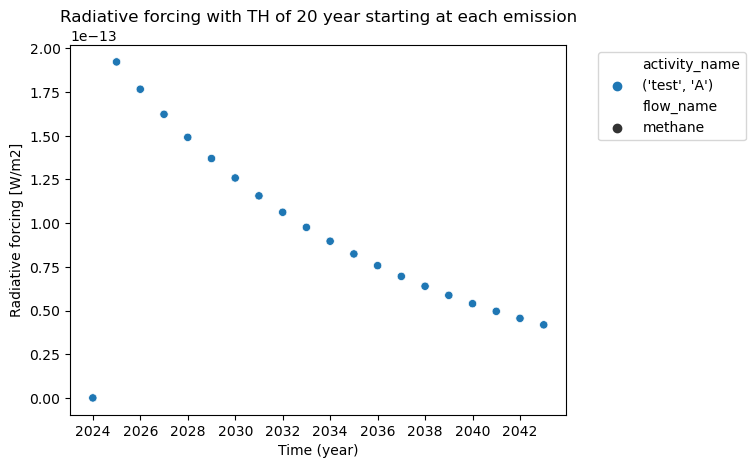

characterized dynamic score: 1.8929098327198874e-12 [radiative_forcing (20)]


In [54]:
mlca.characterize_dynamic_lci(type="radiative_forcing", fixed_TH = False, TH=20)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.characterized_dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")